# Regression linéaire au sens des moindres carrés




Imaginons que nous souhaitions à partir des données ($x_i$ et $y_i$), trouver la fonction qui a permis de générer ces données.

Il faut d'abord une fonction pour générer les valeurs $y_i$ à partir de $x_i$. 

Voir le code ci-dessous pour la création de la fonction $y=2x+3$.

In [3]:
def mafonction(x):
  y=2*x+3
  return y

mafonction(1)

5

Ensuite, il nous suffit de créer les $x_i$. Nous allosn en créer $M=10$.

In [4]:
import numpy as np
M=10 #nombres d'échantillons ou d'individus ou variables explicatives
X=np.zeros((M,1)) # les échantillons ou individus ou variables explicatives
for i in range(0,M):
           X[i,0]=i
print(X)



[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]
 [6.]
 [7.]
 [8.]
 [9.]]


Finalement, nous créons les $y_i$ associés aux $x_i$.

In [5]:
Y=np.zeros((M,1)) # les prédictions ou variables expliquées
for i in range(0,M):
           Y[i,0]=mafonction(i)
print(Y)

[[ 3.]
 [ 5.]
 [ 7.]
 [ 9.]
 [11.]
 [13.]
 [15.]
 [17.]
 [19.]
 [21.]]


Nous pouvons affichier $Y=f(X)$

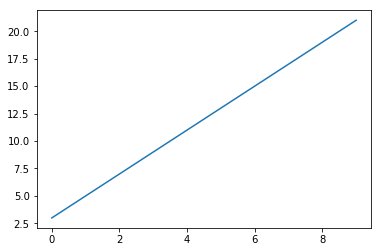

In [6]:
import matplotlib.pyplot as plt

plt.plot(X,Y)
plt.show()

On veut, à partir des echantillons X et Y, trouver le coefficient directeur (a) et l'ordonnée à l'origine (b) de la droite liant ces 2 variables. 

On veut trouver $\widehat{Y_{i,0}}=a \times X_{i,0} + b$.

A la place de $a$ et $b$, nous utiliserons $W_0$ et $W_1$:

$$\widehat{Y_{i,0}}=W_0 \times X_{i,0} + W_1$$


Pour des raisons d'écriture et faciliter les calculs par la suite, nous allons considérer que l'ordonnée à l'origine dépend des données (X) mais nous imposerons que X_{i,1} soit toujours 1 (voir ci-dessous) :
$$\widehat{Y_{i,0}}=W_0 \times X_{i,0} + 1 \times W_1=W_0 \times X_{i,0} + X_{i,1} \times W_1$$


In [7]:
X=np.zeros((M,2)) # les échantillons ont maintenant 2 colonnes
for i in range(0,M):
           X[i,0]=i 
           X[i,1]=1 #toujours 1
print(X)

[[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]
 [5. 1.]
 [6. 1.]
 [7. 1.]
 [8. 1.]
 [9. 1.]]


La prédiction $\widehat{Y_{i,0}}$ peut maintenant s'écrire comme le produit scalaire du vecteur $X_i$ et $W$

$$\widehat{Y_{i,0}}=W_0 \times X_{i,0} + X_{i,1} \times W_1=X_i.W$$


# Le problème

Le problème est donc de trouver $W_0$ et $W_1$ tel que la prédiction ($\widehat{Y_{i,0}}$) soit proche de la valeur désirée ($Y_{i,0}$). Autrement dit, il faut minimiser l'écart (ou l'erreur) entre $\widehat{Y_{i,0}}$ et $Y_{i,0}$.

---

**Le problème : **
$$ \min_W \dfrac{1}{2}L(X,Y;W)$$

Avec L : 
$$L(X,Y;W)=\sum_i^M (Y_i- \widehat{Y}_i)^2$$
La fonction $L$ consiste à calculer la somme des erreurs au carrè. 

Cela peut se ré-écrire à l'aide de la norme L2 élevée au carré.
$$L(X,Y;W)=||Y-\widehat{Y}||^2_2$$

$$L(X,Y;W)=||Y-XW||^2_2=(Y-XW)^2=(Y-XW)^T(Y-XW)$$
On développe L :
$$L(X,Y;W)=Y^TY-W^TX^TY-Y^TXW+W^TX^TXW$$
$$L(X,Y;W)=Y^TY-2W^TX^TY+W^TX^TXW$$


Pourquoi $\dfrac{1}{2}$ devant L dans le problème ?


Cela va simplifier les calculs par la suite. Par forcément ici mais par la suite avec les neurones. 



# Résolution optimale (Analytique)

On veut trouver W qui minimise la fonction L alors on dérive et l'on trouve où la dérivée s'annule.
$$\dfrac{\partial L}{\partial W} = 0 $$ 
**Dérivée partielle de L**

La dérivée partielle de L est simple il s'agit de dériver un polynome de degré 2.
$$\dfrac{\partial L}{\partial W} = -2X^TY+2X^TXW $$ 
Comme on a multiplié par $\dfrac{1}{2}$ alors on peut écrire :
$$\dfrac{\partial L}{\partial W} = -X^TY+X^TXW $$ 
$$\dfrac{\partial L}{\partial W} = X^T(XW-Y) $$ 

**Trouver W**
$$\dfrac{\partial L}{\partial W} = 0 $$ 
$$\dfrac{\partial L}{\partial W} = -X^TY+X^TXW =0$$ 


```
Résultat : 
```
$$W=(X^TX)^{-1}X^TY$$


Maintenant on peut calculer W en python :


# Implémentation

In [8]:
#On calcule W
XT= X.transpose() #Transposé de X
prodX =XT.dot(X) #Produit matriciel
invprodX=np.linalg.inv(prodX) #inversion de matrice
prodxx=invprodX.dot(XT)
W =prodxx.dot(Y)
print(W)


[[2.]
 [3.]]


On peut maintenant calculer la prédiction ($\widehat{Y}$):
$$\widehat{Y_{i,0}}=X_{i,0}.W$$
Le vecteur de prédictions pour tous les echantillons s'écrit:
$$\widehat{Y}=X.W$$



In [9]:
Ypred=X.dot(W)
print(Ypred)

[[ 3.]
 [ 5.]
 [ 7.]
 [ 9.]
 [11.]
 [13.]
 [15.]
 [17.]
 [19.]
 [21.]]


On peut calculer l'erreur entre la valeur réelle et la prédiction:
$$L(X,Y;W)=\dfrac{1}{2}\sum_i^M (Y_i- \widehat{Y}_i)^2$$
$$L(X,Y;W)=\dfrac{1}{2}||Y-\widehat{Y}||^2_2$$


In [10]:
vecerreur=Y-Ypred #vecteur d'erreurs
normeL2=np.linalg.norm(vecerreur,2) #norme du vecteur
erreur=0.5*(normeL2**2) # exponentiation au carré
print(erreur)


0.0


On peut maintenant afficher $Y$ et $\widehat{Y}$:

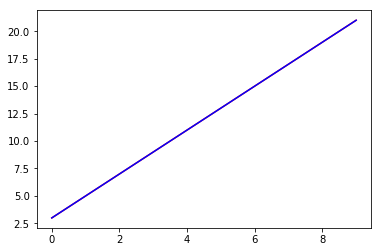

In [11]:
plt.plot(X[:,0],Y,'red')
plt.plot(X[:,0],Ypred,'blue')
plt.show()

# Conclusion
Voilà, nous avons construit une fonction mathématique qui modélise les données d'entrées (X et Y). 

Nous avons trouvé 
$$W_0=2 \text{ et } W_1=3$$
Nous avons retrouvé la fonction 2x+3 qui nous avait servi à générer nos données. 

**Ce qu'il fallait démontrer**

# A faire par les étudiants
Remplacer la fonction "mafonction" par la fonction mathématique $2x+3+Random$ et recalculer $W$ et l'erreur.
Remplacer la fonction "mafonction" par la fonction mathématique $2x^2+3$ et recalculer $W$ et l'erreur. Conclure sur la limite du modèle linéaire.


In [12]:
#à faire par les étudiants

# Résolution itérative
La résolution analytique peut être délicate parfois car elle impose d'inverser la matrice X qui peut être de grande taille.


Une résolution approchée peut être interessante.

Nous allons voir la résolution par descente de gradient.

Un gradient n'est rien d'autre qu'une dérivée à plusieurs dimensions, nous avions calculué le gradient de notre fonction d'erreur ($L$) par rapport à $W$ :

$$\dfrac{\partial L}{\partial W} = X^T(XW-Y) $$ 
L'algorithme de la descente de gradient cherche à diminiuer le gradient progressivement jusqu'à trouver où le gradient s'annule. Pour diminiuer le gradient il suffit de modifier $W$ dans le sens opposé du gradient.
$$W^{t+1}=W^{t}-\alpha. \dfrac{\partial L}{\partial W}$$

$W^{t+1}$ est la nouvelle valeur de $W$

$\alpha$ appelé pas de gradient ou pas d'apprentissage, est un réel représentant la vitesse à la quelle l'algorithme descend la pente du gradient (par exemple : $\alpha$=0.001)



# Algorithme de la descente de gradient

[texte du lien](https://www.overleaf.com/15483446nvydjgtwbngg#/58736810/)

![title](http://romain.raveaux.free.fr/gradientdescentematrix.PNG)




In [13]:

nbiter=20
alpha=0.001
W=np.zeros((2,1))
for t in range(0,nbiter):
  ecart=X.dot(W)-Y
  normeL2=np.linalg.norm(ecart,2) #norme du vecteur
  erreur=0.5*(normeL2**2) # exponentiation au carré
  print(erreur)
  XT=X.transpose()
  gradW=XT.dot(ecart) #calcul du grdient
  W=W-(alpha*gradW)# mise à jour des poids
  


884.9999999999997
448.2800625000001
229.44959485781254
119.78502295311817
64.81428040396605
37.24608206917567
23.40710293051281
16.44681074870201
12.932990045358762
11.146050929990766
10.22445342895388
9.736552852818027
9.466088202287109
9.304708791775882
9.198128550802515
9.119148558904447
9.054140949796151
8.9962771540303
8.942135151701102
8.889999657502553


[[2.39162151]
 [0.52881606]]
8.839010489107693


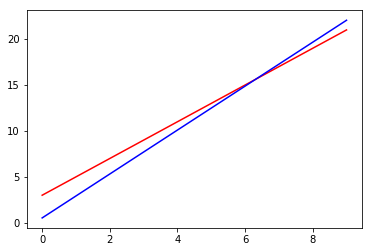

In [14]:
print(W)
Ypred=X.dot(W)
vecerreur=Y-Ypred #vecteur d'erreurs
normeL2=np.linalg.norm(vecerreur,2) #norme du vecteur
erreur=0.5*(normeL2**2) # exponentiation au carré
print(erreur)
plt.plot(X[:,0],Y,'red')
plt.plot(X[:,0],Ypred,'blue')
plt.show()

# A faire par les étudiants
Jouer avec $\alpha$ et $nbiter$ et regarder l'impact sur l'erreur

# Neurone Artificiel
Un neurone artificiel peut être représenté par le diagramme suivant : 
![title](http://romain.raveaux.free.fr/neuroneartificiel.png)

$h$ est une fonction non linéaire aussi appeler fonction d'activation. La fonction sigmoide (sig) ou la fonction tangeante hyperbolique (tanh) sont souvent utilisées comme fonction d'activation.
Nous verrons par la suite l'allure de ces 2 fonctions.
Pour l'instant, voyons ce qui change dans notre problème par rapport à la regression linéaire : 
On veut calculer l'erreur entre la valeur réelle et la prédiction:
$$L(X,Y;W)=\dfrac{1}{2}\sum_i^M (Y_i- \widehat{Y}_i)^2$$
$$L(X,Y;W)=\dfrac{1}{2}||Y-\widehat{Y}||^2_2$$

On peut maintenant calculer la prédiction ($\widehat{Y}$):
$$\widehat{Y_{i,0}}=h(X_{i,0}.W)$$
Le vecteur de prédictions pour tous les echantillons s'écrit:
$$\widehat{Y}=h(X.W)$$


**Le problème : **
$$ \min_W \dfrac{1}{2}L(X,Y;W)$$

$$L(X,Y;W)=\dfrac{1}{2}||Y-h(X.W)||^2_2$$


La seule différence est donc la fonction $h$ mais cela a une grande importance ....

On veut trouver W qui minimise la fonction L alors on dérive et l'on trouve où la dérivée s'annule.
$$\dfrac{\partial L}{\partial W} = 0 $$ 

Résoudre l'équation ci-dessus de manière analytique est difficile, vous pouvez essayer pour vous en convaincre.
Un résolution approchée par descente de gradient reste néanmoins possible. Il suffit pour cela de calculer : $$\dfrac{\partial L}{\partial W}$$






#  Calcul de la dérivée partielle de L


On cherche la dérivée suivante : $\dfrac{\partial L}{\partial W_0} $
L est une composition de fonctions alors sa dérivée s'appuie sur la chaine de dérivation suivante :
Soit $q(p(W_0))$ alors 
$$\dfrac{\partial q}{\partial W_0} = \dfrac{\partial q}{\partial p} \dfrac{\partial p}{\partial W_0}$$ 
**Calcul de la dérivée partielle**

1. $q_1=L_i=\dfrac{1}{2}(Y_i-\widehat{Y_i})^2$ et $p_1=Y_i-\widehat{Y_i}$ donc $q_1=\dfrac{1}{2}(p_1)^2$  

2. $\dfrac{\partial q_1}{\partial W_0} = \dfrac{\partial q_1}{\partial p_1} \dfrac{\partial p_1}{\partial W_0}$=$\dfrac{1}{2}*2*p_1 \dfrac{\partial p_1}{\partial W_0}=(Y_i-\widehat{Y_i})\dfrac{\partial p_1}{\partial W_0}$


3. $p_1=q_2=(Y_i-\widehat{Y_i})$ et $p_2=\widehat{Y_i}$ donc $q_2=(Y_i-p_2)$  
4. $\dfrac{\partial q_2}{\partial W_0} = \dfrac{\partial q_2}{\partial p_2} \dfrac{\partial p_2}{\partial W_0}$=$-1*\dfrac{\partial p_2}{\partial W_0}$



5. $p_2=q_3=sig(z_i)$ et $p_3=z_i$ donc $q_3=sig(p_3)$  
6. $\dfrac{\partial q_3}{\partial W_0} = \dfrac{\partial q_3}{\partial p_3} \dfrac{\partial p_3}{\partial W_0}$=$sig'(z_i)*\dfrac{\partial p_3}{\partial W_0}$

7. $p_3=q_4=z_i$ et $p_4=z_i=X_{i,0}*W_0+X_{i,1}*W_1$ donc $q_4=p4$  
8. $\dfrac{\partial q_4}{\partial W_0} = \dfrac{\partial p_4}{\partial W_0}$=$X_{i,0}$

Résultat Final : 
$$\dfrac{\partial L_i}{\partial W_0}= -(Y_i-\widehat{Y_i})sig'(z_i)X_{i,0}$$
$$\dfrac{\partial L_i}{\partial W_n}= -(Y_i-\widehat{Y_i})sig'(z_i)X_{i,n}$$

Où $sig'(z)$  est la dérivée de sig(z).

La version matricielle peut s'écrire : 
$$\dfrac{\partial L}{\partial W} =- X^T(Y-\widehat{Y}) * sig'(Z) $$ 
Avec $*$ le produit d'hadamard  élément par élément.

# Etude des fonctions d'activation


Fonction sigmoide : 

![Texte alternatif…](https://wikimedia.org/api/rest_v1/media/math/render/svg/faaa0c014ae28ac67db5c49b3f3e8b08415a3f2b)

![Texte alternatif…](https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/SigmoidFunction.svg/330px-SigmoidFunction.svg.png)
[Source des figures](https://fr.wikipedia.org/wiki/Sigmo%C3%AFde_(math%C3%A9matiques)

Fonction tangente hyperbolique

![Texte alternatif…](https://wikimedia.org/api/rest_v1/media/math/render/svg/d7af9916c40421267102260e89cc37a619dbcbe1)

![Texte alternatif…](https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Hyperbolic_Tangent.svg/330px-Hyperbolic_Tangent.svg.png)
[Source des figures](https://fr.wikipedia.org/wiki/Tangente_hyperbolique)

# Version matricielle de la descente de gradient avec une fonction sigmoid

In [15]:
def sigmoid(x):                                        
    return 1 / (1 + np.exp(-x))

def derivative_sigmoid(x):                                        
    return sigmoid(x) * (1-sigmoid(x))


def gradientdescent (X,Y,W,pas,nbiter) :
    
    for t in range (0,nbiter):
        Z=X.dot(W)
        Ypred=sigmoid(Z)
        
        ecart=Y-Ypred
        
        derivesig=derivative_sigmoid(Z)
        
        XT=X.transpose()
        
        #Haddamart product
        ecartderive=np.multiply(ecart,derivesig)
        
        grad=-XT.dot(ecartderive)
       
        W = W -pas*grad
        
        normeL2=np.linalg.norm(ecart,2) #norme du vecteur
        err=0.5*(normeL2**2) # exponentiation au carré
              
        
        print('Itération numéro ',t)
        print('Erreur : ',err)
    return W, err

# Classification avec la fonction sigmoid

Génération d'un ensemble de données : 

M : 200


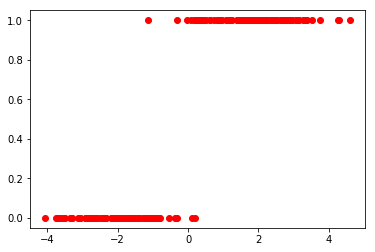

In [16]:
def get_datasetv1():
    """
        Method used to generate the dataset
    """
    # Numbers of row per class
    row_per_class = 100
    # Generate rows
    sick = np.random.randn(row_per_class, 1) - 2
    healthy = np.random.randn(row_per_class, 1) +2 
    ones = np.ones((2*row_per_class,1))

    features = np.vstack([sick, healthy])
    features=np.hstack([features,ones])
    targets=np.zeros((2*row_per_class,1))
    targets[0:row_per_class,0]=0
    targets[row_per_class:2*row_per_class,0]=1

    return features, targets
  
  
X,Y=get_datasetv1()
M=X.shape[0]
print('M :',M)
plt.plot(X[:,0],Y,'ro') 
plt.show()

# Appel à la fonction gradient

In [17]:
W=np.zeros((2,1))
pas=0.1
nbiter=20
print('Pas :',pas)
print('Nombre itération : ',nbiter)
W, error =gradientdescent(X,Y,W,pas,nbiter)


Pas : 0.1
Nombre itération :  20
Itération numéro  0
Erreur :  25.000000000000004
Itération numéro  1
Erreur :  1.700734641232816
Itération numéro  2
Erreur :  1.695393790610234
Itération numéro  3
Erreur :  1.6905967259777464
Itération numéro  4
Erreur :  1.6862802395829042
Itération numéro  5
Erreur :  1.6823896539984533
Itération numéro  6
Erreur :  1.6788774930513182
Itération numéro  7
Erreur :  1.6757023869152188
Itération numéro  8
Erreur :  1.6728281657778508
Itération numéro  9
Erreur :  1.6702231061185036
Itération numéro  10
Erreur :  1.6678593010844287
Itération numéro  11
Erreur :  1.665712132252554
Itération numéro  12
Erreur :  1.6637598245962177
Itération numéro  13
Erreur :  1.661983070037432
Itération numéro  14
Erreur :  1.6603647077754256
Itération numéro  15
Erreur :  1.6588894518102046
Itération numéro  16
Erreur :  1.657543657854343
Itération numéro  17
Erreur :  1.656315123245489
Itération numéro  18
Erreur :  1.6551929146122577
Itération numéro  19
Erreur :  1.

Taux de bonnes classifications= 0.98


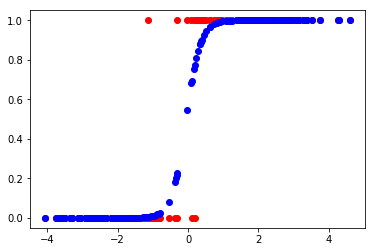

In [18]:
prediction=sigmoid(X.dot(W))
bonneclassif=np.mean(Y==np.round(prediction))
print("Taux de bonnes classifications=",bonneclassif)

plt.plot(X[:,0],Y,'ro',color='red')
plt.plot (X[:,0],prediction,'ro',color='blue')
plt.show()


# Application à la classification de piétons

# Lecture des images

nb files= 200


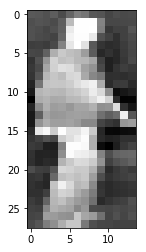

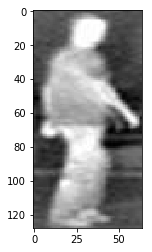

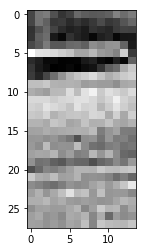

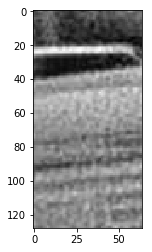

[0.45066026 0.43203281 0.4697479  0.41192477 0.49243697 0.57883153
 0.54763906 0.4552421  0.44207683]
dimension de x= 393
[1.]
(150, 1)
(150, 393)
(50, 1)
(50, 393)


In [35]:
# Vous devez installer la librairie imageio
# pip install imageio

import imageio
from skimage.transform import resize

import warnings
warnings.filterwarnings("ignore")

def readData(dirimg):
    nbfiles = 200
    halfnbfiles=int(nbfiles/2)
    resizew=28
    resizeh=14
    featuresize=resizew*resizeh
    print("nb files=",nbfiles)
    features = np.zeros((nbfiles, featuresize))
    veclabels = np.zeros((nbfiles, 1))
    images = np.zeros((nbfiles, 128,64))

    for i in range(1,halfnbfiles+1):
     image = imageio.imread(dirimg + '/' + "pos"+str(i)+".jpg")
     images[i-1]=image
     image = resize(image, (resizew, resizeh))
     features[i-1, :] = image.reshape((featuresize))
     veclabels[i-1] = 1
    
   
    for i in range(1,halfnbfiles+1):
     image = imageio.imread(dirimg + '/' + "neg"+str(i)+".jpg")
     images[i+halfnbfiles-1]=image
     image = resize(image, (resizew, resizeh))
     features[i+halfnbfiles-1, :] = image.reshape((featuresize))
     veclabels[i+halfnbfiles-1] = 0
     
   
    #on rajoute le biais
    ones = np.ones((nbfiles,1))
    features=np.hstack([features,ones])

    nbtrain=int(nbfiles * 0.75)
    nbtest=int(nbfiles * 0.25)
    setindex=[]
    for i in range(0,nbfiles):
        setindex.append(i)
    np.random.shuffle(setindex)
    trainfeatures=features[setindex[0:nbtrain]]
    testfeatures=features[setindex[nbtrain:nbtrain+nbtest]]
    trainlabels=veclabels[setindex[0:nbtrain]]
    testlabels=veclabels[setindex[nbtrain:nbtrain+nbtest]]
    trainimages=images[setindex[0:nbtrain]]
    testimages=images[setindex[nbtrain:nbtrain+nbtest]]
    return (trainfeatures, trainlabels,testfeatures,testlabels,trainimages,testimages)

#Un example pour la classif avec les pietons
dirimg="./pieton"

trainfeatures, trainlabels,testfeatures,testlabels,trainimages,testimages=readData(dirimg)

X=trainfeatures
Y=trainlabels
images=trainimages

#Affiche l'image en basse résolution que l'on utilise pour la classification
plt.imshow(X[0,0:28*14].reshape((28, 14)), 
           interpolation='nearest', 
           cmap='gray')
plt.show()


#Affiche l'image originale
plt.imshow(images[0].reshape((128, 64)), 
           interpolation='nearest', 
           cmap='gray')
plt.show()


#Affiche l'image en basse résolution que l'on utilise pour la classification
plt.imshow(X[100,0:28*14].reshape((28, 14)), 
           interpolation='nearest', 
           cmap='gray')
plt.show()


#Affiche l'image originale
plt.imshow(images[100].reshape((128, 64)), 
           interpolation='nearest', 
           cmap='gray')
plt.show()

print(X[0,1:10])
nbdim=len(X[0,])
print("dimension de x=",nbdim)
print(Y[0,:])
print(Y.shape)
print(X.shape)
print(testlabels.shape)
print(testfeatures.shape)


#Application directe de la version matricielle de la descente de gradient

# A vous de jouer, classifier les images de piétons 
Faire un programme dans Spyder qui classifie les images de piétons. 
Vous apprendrez sur les données suivantes :
    X=trainfeatures
    Y=trainlabels
    Afficher l'erreur et le taux de bonnes classifications par itération.

Tester votre prédicteur sur :
    X=trainfeatures
    Y=trainlabels
    Afficher l'erreur et le taux de bonnes classifications

Puis sur Tester votre prédicteur sur :
    X=testfeatures
    Y=testlabels
    Afficher l'erreur et le taux de bonnes classifications par itération.

Le but est d'évaluer la capacité du prédicteur à prédire sur de nouvelles données (jamais vue)

Ensuite une fois que vous avez atteint un bon taux de classification passer à la suite.


# L'erreur quadratique vs cross entropy

Minimiser l'erreur quadratique avec une fonction d'activation de type sigmoide rend le problème d'optimisation non-convexe. Une manière classique de contourner ce problème est de minimiser la cross entropy.
$$L_i=-(Y_i \log (\widehat{Y_i})  +  (1-Y_i) \log( 1-\widehat{Y_i} ))$$
Le problème d'optimisation devient : 
$$ \min_W \dfrac{1}{M}\sum_{i=1}^M L_i(X,Y;W)$$

On veut trouver W qui minimise la fonction L alors on dérive et l'on trouve où la dérivée s'annule.
$$\dfrac{\partial L}{\partial W} = 0 $$ 

Résoudre l'équation ci-dessus de manière analytique est difficile, vous pouvez essayer pour vous en convaincre.
Un résolution approchée par descente de gradient reste néanmoins possible. Il suffit pour cela de calculer : $$\dfrac{\partial L}{\partial W}$$


#  Calcul de la dérivée partielle de L


On cherche la dérivée suivante : $\dfrac{\partial L}{\partial W_0} $
L est une composition de fonctions alors sa dérivée s'appuie sur la chaine de dérivation suivante :
Soit $q(p(W_0))$ alors 
$$\dfrac{\partial q}{\partial W_0} = \dfrac{\partial q}{\partial p} \dfrac{\partial p}{\partial W_0}$$ 
La dérivée de la fonction $log(x)$  est égale à $\dfrac{\partial log(x)}{\partial x} =\dfrac{1}{x}$.

La dérivée de la fonction $sigmoid(x)$  est égale à $\dfrac{\partial sigmoid(x)}{\partial x} =sigmoid(x) . (1-sigmoid(x))$.

**Calcul de la dérivée partielle**

1. $q_1=L_i=-(Y_i \log (\widehat{Y_i})  +  (1-Y_i) \log( 1-\widehat{Y_i} ))$ et $p_1=\widehat{Y_i}$ donc $q_1=-(Y_i \log (p_1)  +  (1-Y_i) \log( 1-p_1) )$  

2. $\dfrac{\partial q_1}{\partial W_0} = \dfrac{\partial q_1}{\partial p_1} \dfrac{\partial p_1}{\partial W_0}=(-\dfrac{Y_i}{\widehat{Y_i}}+\dfrac{1-Y_i}{1-\widehat{Y_i}})\dfrac{\partial p_1}{\partial W_0}$

3. $q_2=\widehat{Y_i}=sigmoid(z_i)$ et $p_2=z_i$ donc $q_2=sigmoid(z_i)$  

4. $\dfrac{\partial q_2}{\partial W_0} = \dfrac{\partial q_2}{\partial p_2} \dfrac{\partial p_2}{\partial W_0}=sigmoid(z_i)*(1-sigmoid(z_i)) \dfrac{\partial p_2}{\partial W_0}$

5. $q_3=z_i$ et $p_3=z_i=X_{i,0}*W_0+X_{i,1}*W_1$ donc $q_3=p3$  
8. $\dfrac{\partial q_3}{\partial W_0} = \dfrac{\partial p_3}{\partial W_0}$=$X_{i,0}$

Résultat Final : 
$$\dfrac{\partial L_i}{\partial W_0}= (-\dfrac{Y_i}{\widehat{Y_i}}+\dfrac{1-Y_i}{1-\widehat{Y_i}}) (sigmoid(z_i)*(1-sigmoid(z_i)))X_{i,0}$$
$$\dfrac{\partial L_i}{\partial W_0}= (-\dfrac{Y_i}{\widehat{Y_i}}+\dfrac{1-Y_i}{1-\widehat{Y_i}}) (\widehat{Y_i}*(1-\widehat{Y_i}))X_{i,0}$$

$$\dfrac{\partial L_i}{\partial W_0}= (\widehat{Y_i} -Y_i)  X_{i,0}$$

La version matricielle : 

$$\dfrac{\partial L}{\partial W}= X^T(\widehat{Y} -Y)  $$


# Régression Logistique :Descente de Gradient Matricielle 

In [36]:
def gradientdescent (X,Y,W,pas,nbiter) :
    
    for t in range (0,nbiter):
        Z=X.dot(W)
        Ypred=sigmoid(Z)
        
        ecart=Ypred-Y
        
        XT=X.transpose()
        grad=XT.dot(ecart)
       
        W = W -pas*grad
        
        print('Itération numéro ',t)
        print('Erreur : ',err)
    return W, err



# A vous de jouer
Classifier les images de piétons avec la nouvelle fonction à minimiser (la cross entropy)


Faire un programme dans Spyder qui classifie les images de piétons. 
Vous apprendrez sur les données suivantes :
    X=trainfeatures
    Y=trainlabels
    Afficher l'erreur (attention la cross entropy) et le taux de bonnes classifications par itération.

Tester votre prédicteur sur :
    X=trainfeatures
    Y=trainlabels
    Afficher l'erreurr et le taux de bonnes classifications

Puis sur Tester votre prédicteur sur :
    X=testfeatures
    Y=testlabels
    Afficher l'erreurr et le taux de bonnes classifications par itération.

Le but est d'évaluer la capacité du prédicteur à prédire sur de nouvelles données (jamais vue)
